# Model Evaluation Metrics

In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, log_loss
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## A. Classification Metrics

Used when the target variable is categorical (e.g., Yes/No, True/False, Survived/Not Survived, Spam/Not Spam).
Accuracy only is not enough especially when the classes are imbalanced.

In [2]:
# 1000 rows
# In target class let's say the True class is 85% and the False class is 15%.
# If we just predict everything as True, we will get 85% accuracy. But this is not a good model.

In [6]:
df = pd.read_csv('./data/titanic_cleaned.csv')

# Splitting the data into features and target variable
X = df.drop('Survived', axis=1).values.astype(float)
y = df['Survived'].values

# Splitting the dataset into training and testing sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)


sklearn_model = LogisticRegression()
sklearn_model.fit(X_train, y_train)
y_pred_sklearn = sklearn_model.predict(X_test)

print("Titanic Survival Prediction Model trained using Logistic Regression.")

Titanic Survival Prediction Model trained using Logistic Regression.


### 1. Confusion Matrix

It's a table that summarizes the performance of a classification model.

* True Positive (TP): Predicted Survival, Actually Survived.
* True Negative (TN): Predicted Death, Actually Died.
* False Positive (FP): Predicted Survival, Actually Died. (Type I Error)
* False Negative (FN): Predicted Death, Actually Survived. (Type II Error)


These are the foundation for calculating Accuracy, Precision, Recall, F1-Score.

*Tips*
- Principal Diagonal: Correct Predictions
- Off-Diagonal: Errors

***Confusion Matrix***

![](https://images.prismic.io/encord/edfa849b-03fb-43d2-aba5-1f53a8884e6f_image5.png?auto=compress,format)

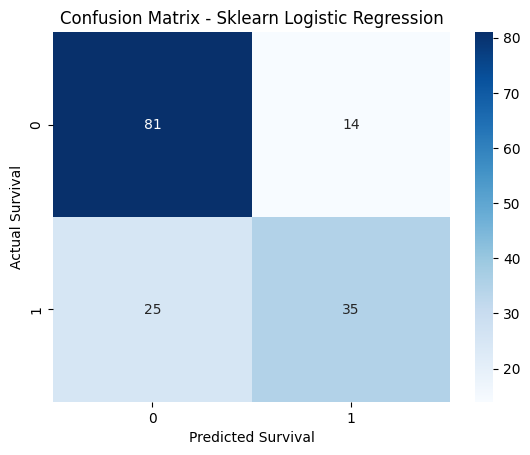

In [12]:
cm = confusion_matrix(y_test, y_pred_sklearn)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title("Confusion Matrix - Sklearn Logistic Regression")
plt.xlabel("Predicted Survival")
plt.ylabel("Actual Survival")
plt.show()

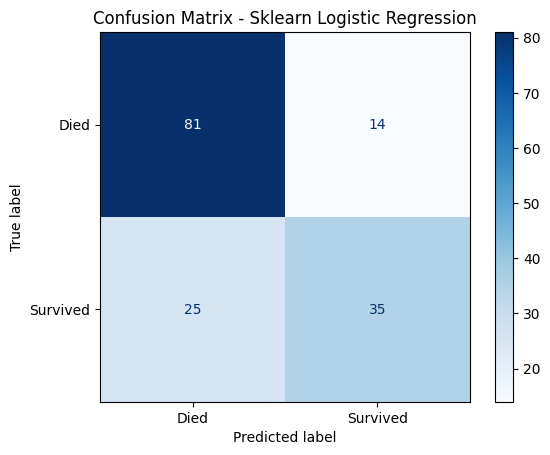

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_sklearn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Died', 'Survived'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Sklearn Logistic Regression")
plt.show()

In [27]:
# Actually Died = (81 + 14) = 95
# Actually Survived = (25 + 35) = 60


# Recall for Died = 81/95 = 0.8526
# Recall for Survived = 35/60 = 0.5833

### 2. Accuracy

Ratio of correct predictions to total predictions.

Formula: (TP + TN)/(TP + TN + FP + FN)

Measures how many right predictions were made out of the total.

It is reliable when the classes are balanced (eg: 50% survived, 50% died).


`Caution`: If 95% of people died, a model that predicts "Died" for everyone has 95% accuracy but is useless. This is called **Accuracy Paradox**.

In [26]:
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Accuracy: {accuracy_sklearn:.4f}")


Accuracy: 0.7484


### 3. Precision

Out of all the instances predicted as positive, how many are actually positive

Formula: (TP)/(TP + FP)

Significance: It tells us how reliable our "Positive" prediction is. A high FP rate kills precision.


We don't want to label a real email (Negative) as spam (Positive). We want to be very precise when we say "This is spam."

In [22]:
precision_sklearn = precision_score(y_test, y_pred_sklearn)
print(f"Precision: {precision_sklearn:.4f}")

Precision: 0.7143


### 3. Recall (Sensitivity / True Positive Rate (TPR))

Out of actual positive instances, how many did the model predict correctly?

Formula: (TP)/(TP + FN)

Significance: It tells us how good the model is at finding the positive cases.

In [ ]:
recall_sklearn = recall_score(y_test, y_pred_sklearn)
cr = classification_report(y_test, y_pred_sklearn)

print(f"Recall: {recall_sklearn:.4f}")
print("\nClassification Report - Sklearn Logistic Regression:\n", cr)

Recall: 0.5833

Classification Report - Sklearn Logistic Regression:
               precision    recall  f1-score   support

           0       0.76      0.85      0.81        95
           1       0.71      0.58      0.64        60

    accuracy                           0.75       155
   macro avg       0.74      0.72      0.72       155
weighted avg       0.74      0.75      0.74       155



![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSfWwbfOTEx53O6AKMVae-MYKIYSlOjsffjnw&s)

In [31]:
# TP = 100, TN = 50
# FN = 5, FP = 10

# Accuracy = (TP + TN) / (TP + TN + FP + FN)  
# (100 + 50) / (100 + 50 + 10 + 5) = 150/165 = 0.91

# Precision for "YES" = TP / (TP + FP)  
# 100 / (100 + 10) = 100/110 = 0.91


# Recall for "YES" = TP / (TP + FN)  
# 100 / (100 + 5) = 100/105 = 0.95

# Precision for "NO" 
#  50/(50 + 5) = 50/55 = 0.91

# Recall for "NO" 
#  50/(50 + 10) = 50/60 = 0.83

### 4. F1-Score

Harmonic mean of Precision and Recall

Formula: (2 * Precision * Recall)/(Precision + Recall)

Significance: It provides a single metric that balances both concerns. It punishes extreme values (e.g., Precision is 100% but recall is 1%, F1 will be very low).

`If either Precision or Recall is bad, F1 will be bad.`

In [33]:
f1_sklearn = f1_score(y_test, y_pred_sklearn)
print(f"F1 Score: {f1_sklearn:.4f}")

F1 Score: 0.6422


![](https://cdn.prod.website-files.com/660ef16a9e0687d9cc27474a/662c4267dc614ac9ad29b2e6_644afed8b72fe836c6eae060_class_guide_multi_abc13.png)

![](https://i.sstatic.net/fHPAO.png)

### 5. AUC-ROC Curve

Receiver Operating Characteristic (ROC): A plot of TPR vs FPR

* TPR (True Positive Rate/ Recall) = TP / TP + FN
* FPR (False Positive Rate) = FP / (FP + TN)

AUC (Area Under Curve): A single number summarizing the plot.

Significance: It measures the model's ability to distinguish between the classes.

AUC = 1.0 : Perfect Separation
AUC = 0.5 : Random Guessing

When to use: When we want to evaluate the quality of the probality predictions, not just the final label.

`The clear higher the curve goes to the top-left, the better`

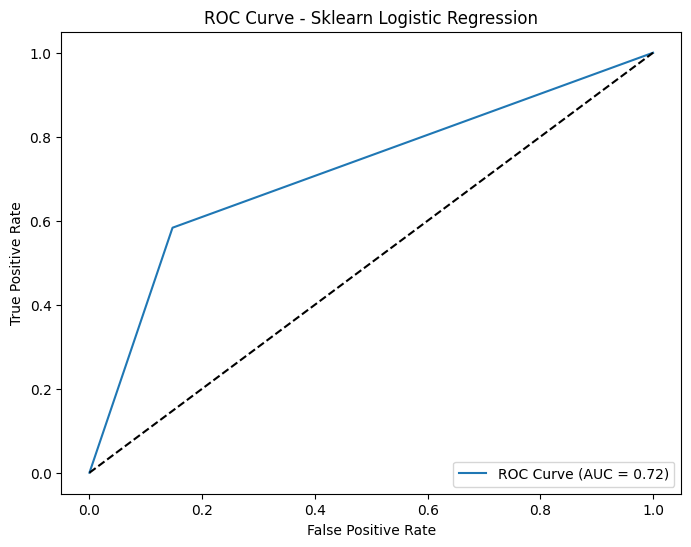

In [35]:
auc = roc_auc_score(y_test, y_pred_sklearn)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sklearn)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Sklearn Logistic Regression')
plt.legend(loc='lower right')
plt.show()

### 6. Log Loss

Estimates the probability error.

![](https://i.ytimg.com/vi/IYzc_2rY9k8/maxresdefault.jpg)


It heavily penalizes predictions that are confident but wrong.

Closer to 0 is better.

In [36]:
print(f"Log Loss: {log_loss(y_test, y_pred_sklearn):.4f}")

Log Loss: 9.0690
